<img src="x-logo.png" style="height:100px"> 
# SpaceX Analysis
#### Insightful and impactful findings from SpaceX data


_____________

# 1: Brief description of data and initial plan

Summary:
* I have chosen a dataset on SpaceX, this was found on Kaggle.com. 
* The data contains 41 rows and 16 columns. 
* SpaceX have done a total of 100 launches at the time of this writing; As my data only includes 41 examples, this is due to the data ending at Flight FT-11 in February 2017.  
* The 16 features are following: Flight number, launch date, launch time, launch site, vehicle type, payload name, payload type, payload mass, payload orbit, customer name, customer type, customer country, mission outcome, failure reasion, landing type and landing outcome.

In [22]:
# inspecting data

# imports 
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

#can be changed
sns.set_context("notebook")
sns.set_style("whitegrid")

# reading in csv
data = pd.read_csv('database.csv')
data;


#Printing out info
display(data.head())
print("")
print("Rows:", data.shape[0])
print("Columns:", data.shape[1])
print("")
print("All columns:")
print(data.columns.tolist())
print("")
print("Data types and NaN values:")
print(data.info())

,Flight Number,Launch Date,Launch Time,Launch Site,Vehicle Type,Payload Name,Payload Type,Payload Mass (kg),Payload Orbit,Customer Name,Customer Type,Customer Country,Mission Outcome,Failure Reason,Landing Type,Landing Outcome
0,F1-1,24 March 2006,22:30,Marshall Islands,Falcon 1,FalconSAT-2,Research Satellite,19.5,NaN,DARPA,Government,United States,Failure,Engine Fire During Launch,NaN,NaN
1,F1-2,21 March 2007,01:10,Marshall Islands,Falcon 1,DemoSat,NaN,NaN,NaN,DARPA,Government,United States,Failure,Engine Shutdown During Launch,NaN,NaN
2,F1-3,3 August 2008,03:34,Marshall Islands,Falcon 1,Trailblazer,Communication Satellite,NaN,NaN,ORS,Government,United States,Failure,Collision During Launch,NaN,NaN
3,F1-3,3 August 2008,03:34,Marshall Islands,Falcon 1,"PRESat, NanoSail-D",Research Satellites,8.0,NaN,NASA,Government,United States,Failure,Collision During Launch,NaN,NaN
4,F1-3,3 August 2008,03:34,Marshall Islands,Falcon 1,Explorers,Human Remains,NaN,NaN,Celestis,Business,United States,Failure,Collision During Launch,NaN,NaN



Rows: 41
Columns: 16

All columns:
['Flight Number', 'Launch Date', 'Launch Time', 'Launch Site', 'Vehicle Type', 'Payload Name', 'Payload Type', 'Payload Mass (kg)', 'Payload Orbit', 'Customer Name', 'Customer Type', 'Customer Country', 'Mission Outcome', 'Failure Reason', 'Landing Type', 'Landing Outcome']

Data types and NaN values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 16 columns):
Flight Number        41 non-null object
Launch Date          41 non-null object
Launch Time          41 non-null object
Launch Site          41 non-null object
Vehicle Type         41 non-null object
Payload Name         41 non-null object
Payload Type         38 non-null object
Payload Mass (kg)    33 non-null float64
Payload Orbit        36 non-null object
Customer Name        39 non-null object
Customer Type        39 non-null object
Customer Country     39 non-null object
Mission Outcome      41 non-null object
Failure Reason       8 non-null objec

Initial plan for data cleaning:
* I will need to firstly clean data. 
* As some of the variables depend on others, there are a lot of NaN values. 
* As example, the first flight failed at launch, and the values for landing type and outcome are NaN.
* I will transform these to "No landing"


Initial plan for data exploration:
* I'm interested in the customers they have had. 
* I will seek to find the number of customers, their biggest customer, whether the customer has influence on other features and otherwise be curious as what to find
* I will transform categorical variables into binary so I can make a heat-map of features and find correlations

_____________

_____________

_____________

__________________________

# 2: Actions taken for cleaning and feature engineering 

## Cleaning NaN values:
### Many values had NaN as e.g. "Failure Reason" is NaN when the rocket did not fail. This is what I did:
* All Payload Type NaN values has been converted to "Demo launch"
* Payload Mass NaN values changed initially to "No payload/No info", as they may prove usefull later; I considered removing the column completely. I ended up changing to 0 instead, so I could calculate skewness, though I realize, this is not optimal
* Payload Orbit was removed, as I didn't see any interesting objective it could be used for
* Customer name had only 2 NaN values, and as customers was my main interest, I chose to remove the 2 rows.
* Failure Reason column included NaN for succesful flights, so I rewrote them as "No Failure"
* Replaced NaN values for Landing type with "No info" as it was a mix of no landing and not informed
* Landing Outcomes NaN values set to "No landing"

### I also tried grouping up values like the origin of customer and the customers' names

In [10]:
# Transform Launch Date to Pandas datetime object
data["Launch Date"] = pd.to_datetime(data["Launch Date"])
data.drop("Launch Time", inplace=True, axis=1)

# Summing flight number
# Creating new column 
data["Flight Number, sum"] = data["Flight Number"]
# Adding one 
i = 0
for i in range(data.shape[0] + 1):
    data["Flight Number, sum"][i] = i
data["Flight Number"] = data["Flight Number, sum"]
data.drop("Flight Number, sum", inplace=True, axis=1)
data["Flight Number"] = pd.to_numeric(data["Flight Number"])

# Changing customers with only one order to "Others" as to better one-hot encode later
customers = data["Customer Name"].value_counts() 
other_customer = list(customers[customers <= 1].index)
data["Customer Name"] = data["Customer Name"].replace(other_customer, "Other")

# Changing Asian countries to same group
japan = data["Customer Country"] == "Japan"
china = data["Customer Country"] == "China"
thailand = data["Customer Country"] == "Thailand"
malaysia = data["Customer Country"] == "Malaysia"
asian_countries = japan + china + thailand + malaysia
j = 0
for j in range(data.shape[0]):
    if asian_countries[j] == True:
        data["Customer Country"][j] = "Asia"
    else:
        continue 
        
# Changing non-American and non-Asian to others
customers_country = data["Customer Country"].value_counts() 
other_customer_country = list(customers_country[customers_country <= 2].index)
data["Customer Country"] = data["Customer Country"].replace(other_customer_country, "Other")


# Fixing NaN values 
data["Payload Type"] = data["Payload Type"].replace(np.nan, "Demo launch", regex=True)
data["Payload Mass (kg)"] = data["Payload Mass (kg)"].replace(np.nan, 0)
data.drop("Payload Orbit", inplace=True, axis=1) 
data.drop("Payload Name", inplace=True, axis=1) 
data = data.drop([5,7]);
data["Failure Reason"] = data["Failure Reason"].replace(np.nan, "No failure until landing", regex=True)
data["Landing Type"] = data["Landing Type"].replace(np.nan, "No info", regex=True)
data["Landing Outcome"] = data["Landing Outcome"].replace(np.nan, "No landing", regex=True)

data

C:\Users\brosb\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
C:\Users\brosb\Anaconda3\lib\site-packages\pandas\core\computation\expressions.py:194: UserWarning: evaluating in Python space because the '+' operator is not supported by numexpr for the bool dtype, use '|' instead
  op=op_str, alt_op=unsupported[op_str]
C:\Users\brosb\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,Flight Number,Launch Date,Launch Site,Vehicle Type,Payload Type,Payload Mass (kg),Customer Name,Customer Type,Customer Country,Mission Outcome,Failure Reason,Landing Type,Landing Outcome
0,0,2006-03-24,Marshall Islands,Falcon 1,Research Satellite,19.5,DARPA,Government,United States,Failure,Engine Fire During Launch,No info,No landing
1,1,2007-03-21,Marshall Islands,Falcon 1,Demo launch,0.0,DARPA,Government,United States,Failure,Engine Shutdown During Launch,No info,No landing
2,2,2008-08-03,Marshall Islands,Falcon 1,Communication Satellite,0.0,Other,Government,United States,Failure,Collision During Launch,No info,No landing
3,3,2008-08-03,Marshall Islands,Falcon 1,Research Satellites,8.0,NASA,Government,United States,Failure,Collision During Launch,No info,No landing
4,4,2008-08-03,Marshall Islands,Falcon 1,Human Remains,0.0,Other,Business,United States,Failure,Collision During Launch,No info,No landing
6,6,2009-07-14,Marshall Islands,Falcon 1,Weather Satellite,180.0,Other,Government,Asia,Success,No failure until landing,No info,No landing
8,8,2010-12-08,Cape Canaveral AFS LC-40,Falcon 9 (v1.0),Space Station Supplies,0.0,NASA,Government,United States,Success,No failure until landing,Parachute,Failure
9,9,2012-05-22,Cape Canaveral AFS LC-40,Falcon 9 (v1.0),Space Station Supplies,0.0,NASA,Government,United States,Success,No failure until landing,No info,No landing
10,10,2012-10-08,Cape Canaveral AFS LC-40,Falcon 9 (v1.0),Space Station Supplies,500.0,NASA,Government,United States,Success,No failure until landing,No info,No landing
11,11,2012-10-08,Cape Canaveral AFS LC-40,Falcon 9 (v1.0),Communication Satellite,150.0,Orbcomm,Business,United States,Failure,Engine Failure During Flight,No info,No landing


## Feature engineering
As most of variables are string values, I will one-hot encode those, should I use them in regression later on.
* Initially I planned to log transform Payload Mass, but the result was actually worse, so I chose not to do it 

In [11]:
# Making new dataframe
df = data.copy()

one_hot_encode_cols = df.dtypes[df.dtypes == np.object]  # filtering by string categoricals
one_hot_encode_cols = one_hot_encode_cols.index.tolist()  # list of categorical fields

#Doing the encoding
df = pd.get_dummies(df, columns=one_hot_encode_cols, drop_first=True)
df.describe()


,Flight Number,Payload Mass (kg),Launch Site_Kennedy Space Center LC-39A,Launch Site_Marshall Islands,Launch Site_Vandenberg AFB SLC-4E,Vehicle Type_Falcon 9 (v1.0),Vehicle Type_Falcon 9 (v1.1),Vehicle Type_Falcon 9 Full Thrust (v1.2),Payload Type_Communication/Research Satellite,Payload Type_Demo launch,...,Failure Reason_No failure until landing,Failure Reason_Vehicle Explosion Before Launch,Failure Reason_Vehicle Explosion During Flight,Landing Type_No info,Landing Type_None,Landing Type_Ocean,Landing Type_Parachute,Landing Type_Ship,Landing Outcome_No landing,Landing Outcome_Success
count,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,...,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000
mean,20.717949,2314.038462,0.025641,0.153846,0.076923,0.128205,0.410256,0.307692,0.025641,0.025641,...,0.794872,0.025641,0.025641,0.307692,0.179487,0.128205,0.025641,0.282051,0.487179,0.307692
std,11.838716,2201.865526,0.160128,0.365518,0.269953,0.338688,0.498310,0.467572,0.160128,0.160128,...,0.409074,0.160128,0.160128,0.467572,0.388776,0.338688,0.160128,0.455881,0.506370,0.467572
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,11.500000,165.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,21.000000,2257.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,30.500000,3879.500000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
max,40.000000,9600.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39 entries, 0 to 40
Data columns (total 42 columns):
Flight Number                                     39 non-null int64
Launch Date                                       39 non-null datetime64[ns]
Payload Mass (kg)                                 39 non-null float64
Launch Site_Kennedy Space Center LC-39A           39 non-null uint8
Launch Site_Marshall Islands                      39 non-null uint8
Launch Site_Vandenberg AFB SLC-4E                 39 non-null uint8
Vehicle Type_Falcon 9 (v1.0)                      39 non-null uint8
Vehicle Type_Falcon 9 (v1.1)                      39 non-null uint8
Vehicle Type_Falcon 9 Full Thrust (v1.2)          39 non-null uint8
Payload Type_Communication/Research Satellite     39 non-null uint8
Payload Type_Demo launch                          39 non-null uint8
Payload Type_Human Remains                        39 non-null uint8
Payload Type_Research Satellite                   39 non-null uint8
Pa

##### I used the code from the tutorial to look at my float variable, Payload Mass, but I chose not to use this, as the result was rather poor

In [13]:
# I chose to add one to all fields to prevent skewness

# df["Payload Mass (kg) + 1"] = df["Payload Mass (kg)"] + 1

# Let's look at what happens to one of these features, when we apply np.log visually.
'''
# Choose a field
field = "Payload Mass (kg) + 1"

# Create two "subplots" and a "figure" using matplotlib
fig, (ax_before, ax_after) = plt.subplots(1, 2, figsize=(20, 5))

# Create a histogram on the "ax_before" subplot
df[field].hist(ax=ax_before)

# Apply a log transformation (numpy syntax) to this column
df[field].apply(np.log).hist(ax=ax_after)

# Formatting of titles etc. for each subplot
ax_before.set(title='before np.log1p', ylabel='frequency', xlabel='value')
ax_after.set(title='after np.log1p', ylabel='frequency', xlabel='value')
fig.suptitle('Field "{}"'.format(field));
'''

'\n# Choose a field\nfield = "Payload Mass (kg) + 1"\n\n# Create two "subplots" and a "figure" using matplotlib\nfig, (ax_before, ax_after) = plt.subplots(1, 2, figsize=(20, 5))\n\n# Create a histogram on the "ax_before" subplot\ndf[field].hist(ax=ax_before)\n\n# Apply a log transformation (numpy syntax) to this column\ndf[field].apply(np.log).hist(ax=ax_after)\n\n# Formatting of titles etc. for each subplot\nax_before.set(title=\'before np.log1p\', ylabel=\'frequency\', xlabel=\'value\')\nax_after.set(title=\'after np.log1p\', ylabel=\'frequency\', xlabel=\'value\')\nfig.suptitle(\'Field "{}"\'.format(field));\n'

### I could now plot my data into a Correlation Matrix

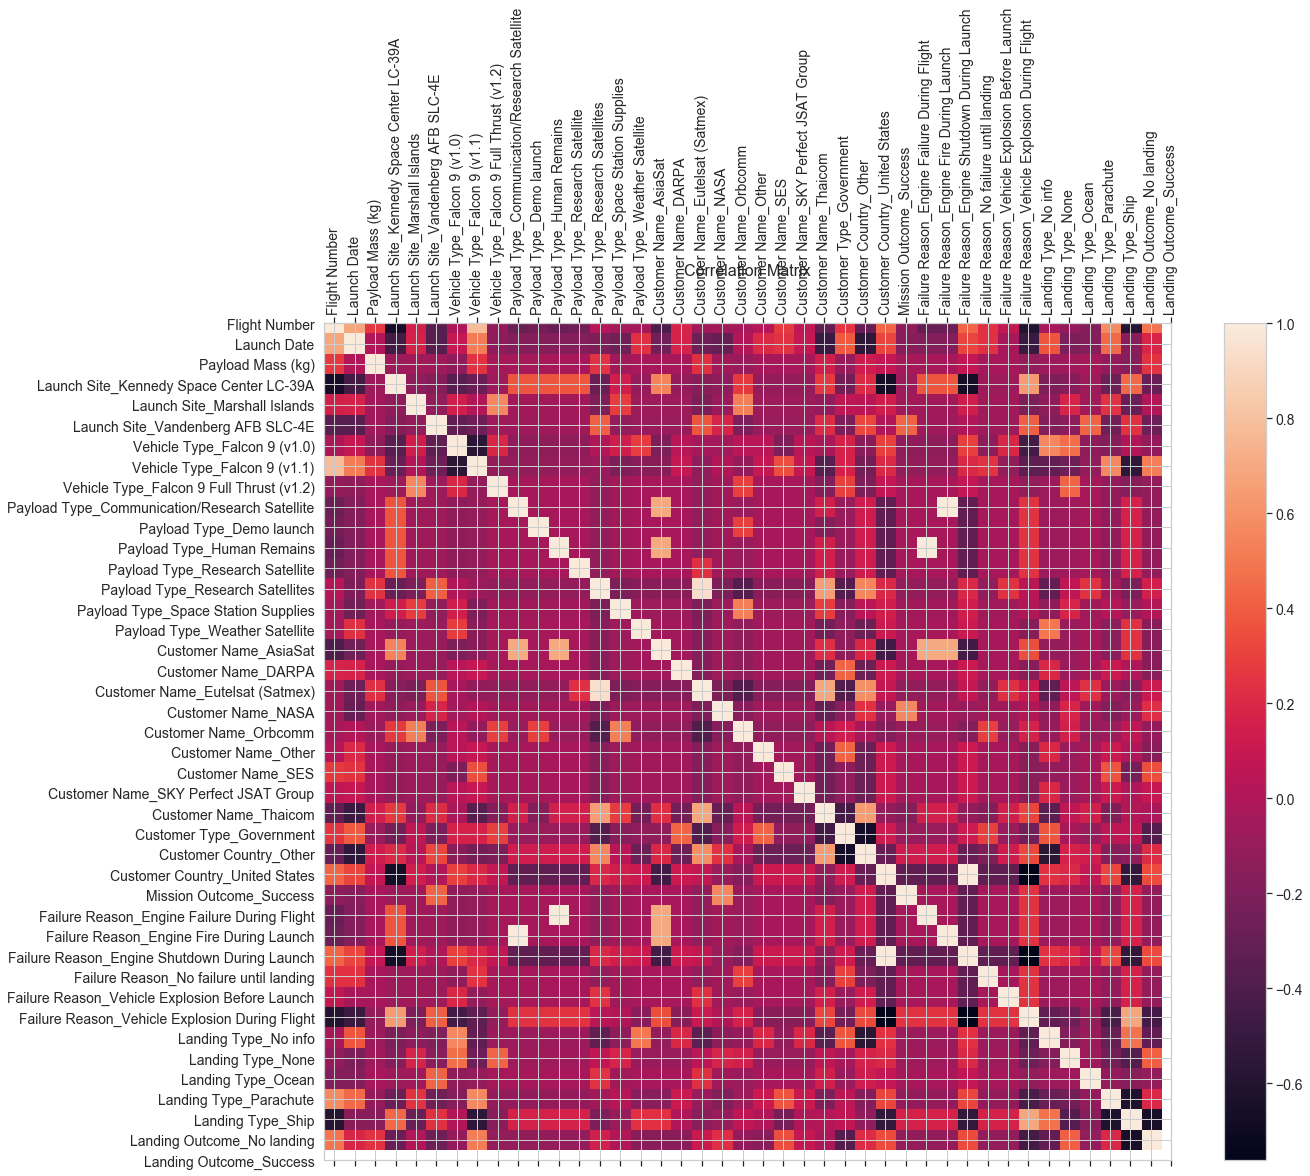

In [14]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

f = plt.figure(figsize=(19, 15))
plt.matshow(df.corr(), fignum=f.number)
plt.xticks(range(df.shape[1]), df.columns, fontsize=14, rotation=90)
plt.yticks(range(df.shape[1]), df.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

### As this was hard to grasp, I tried with a smaller

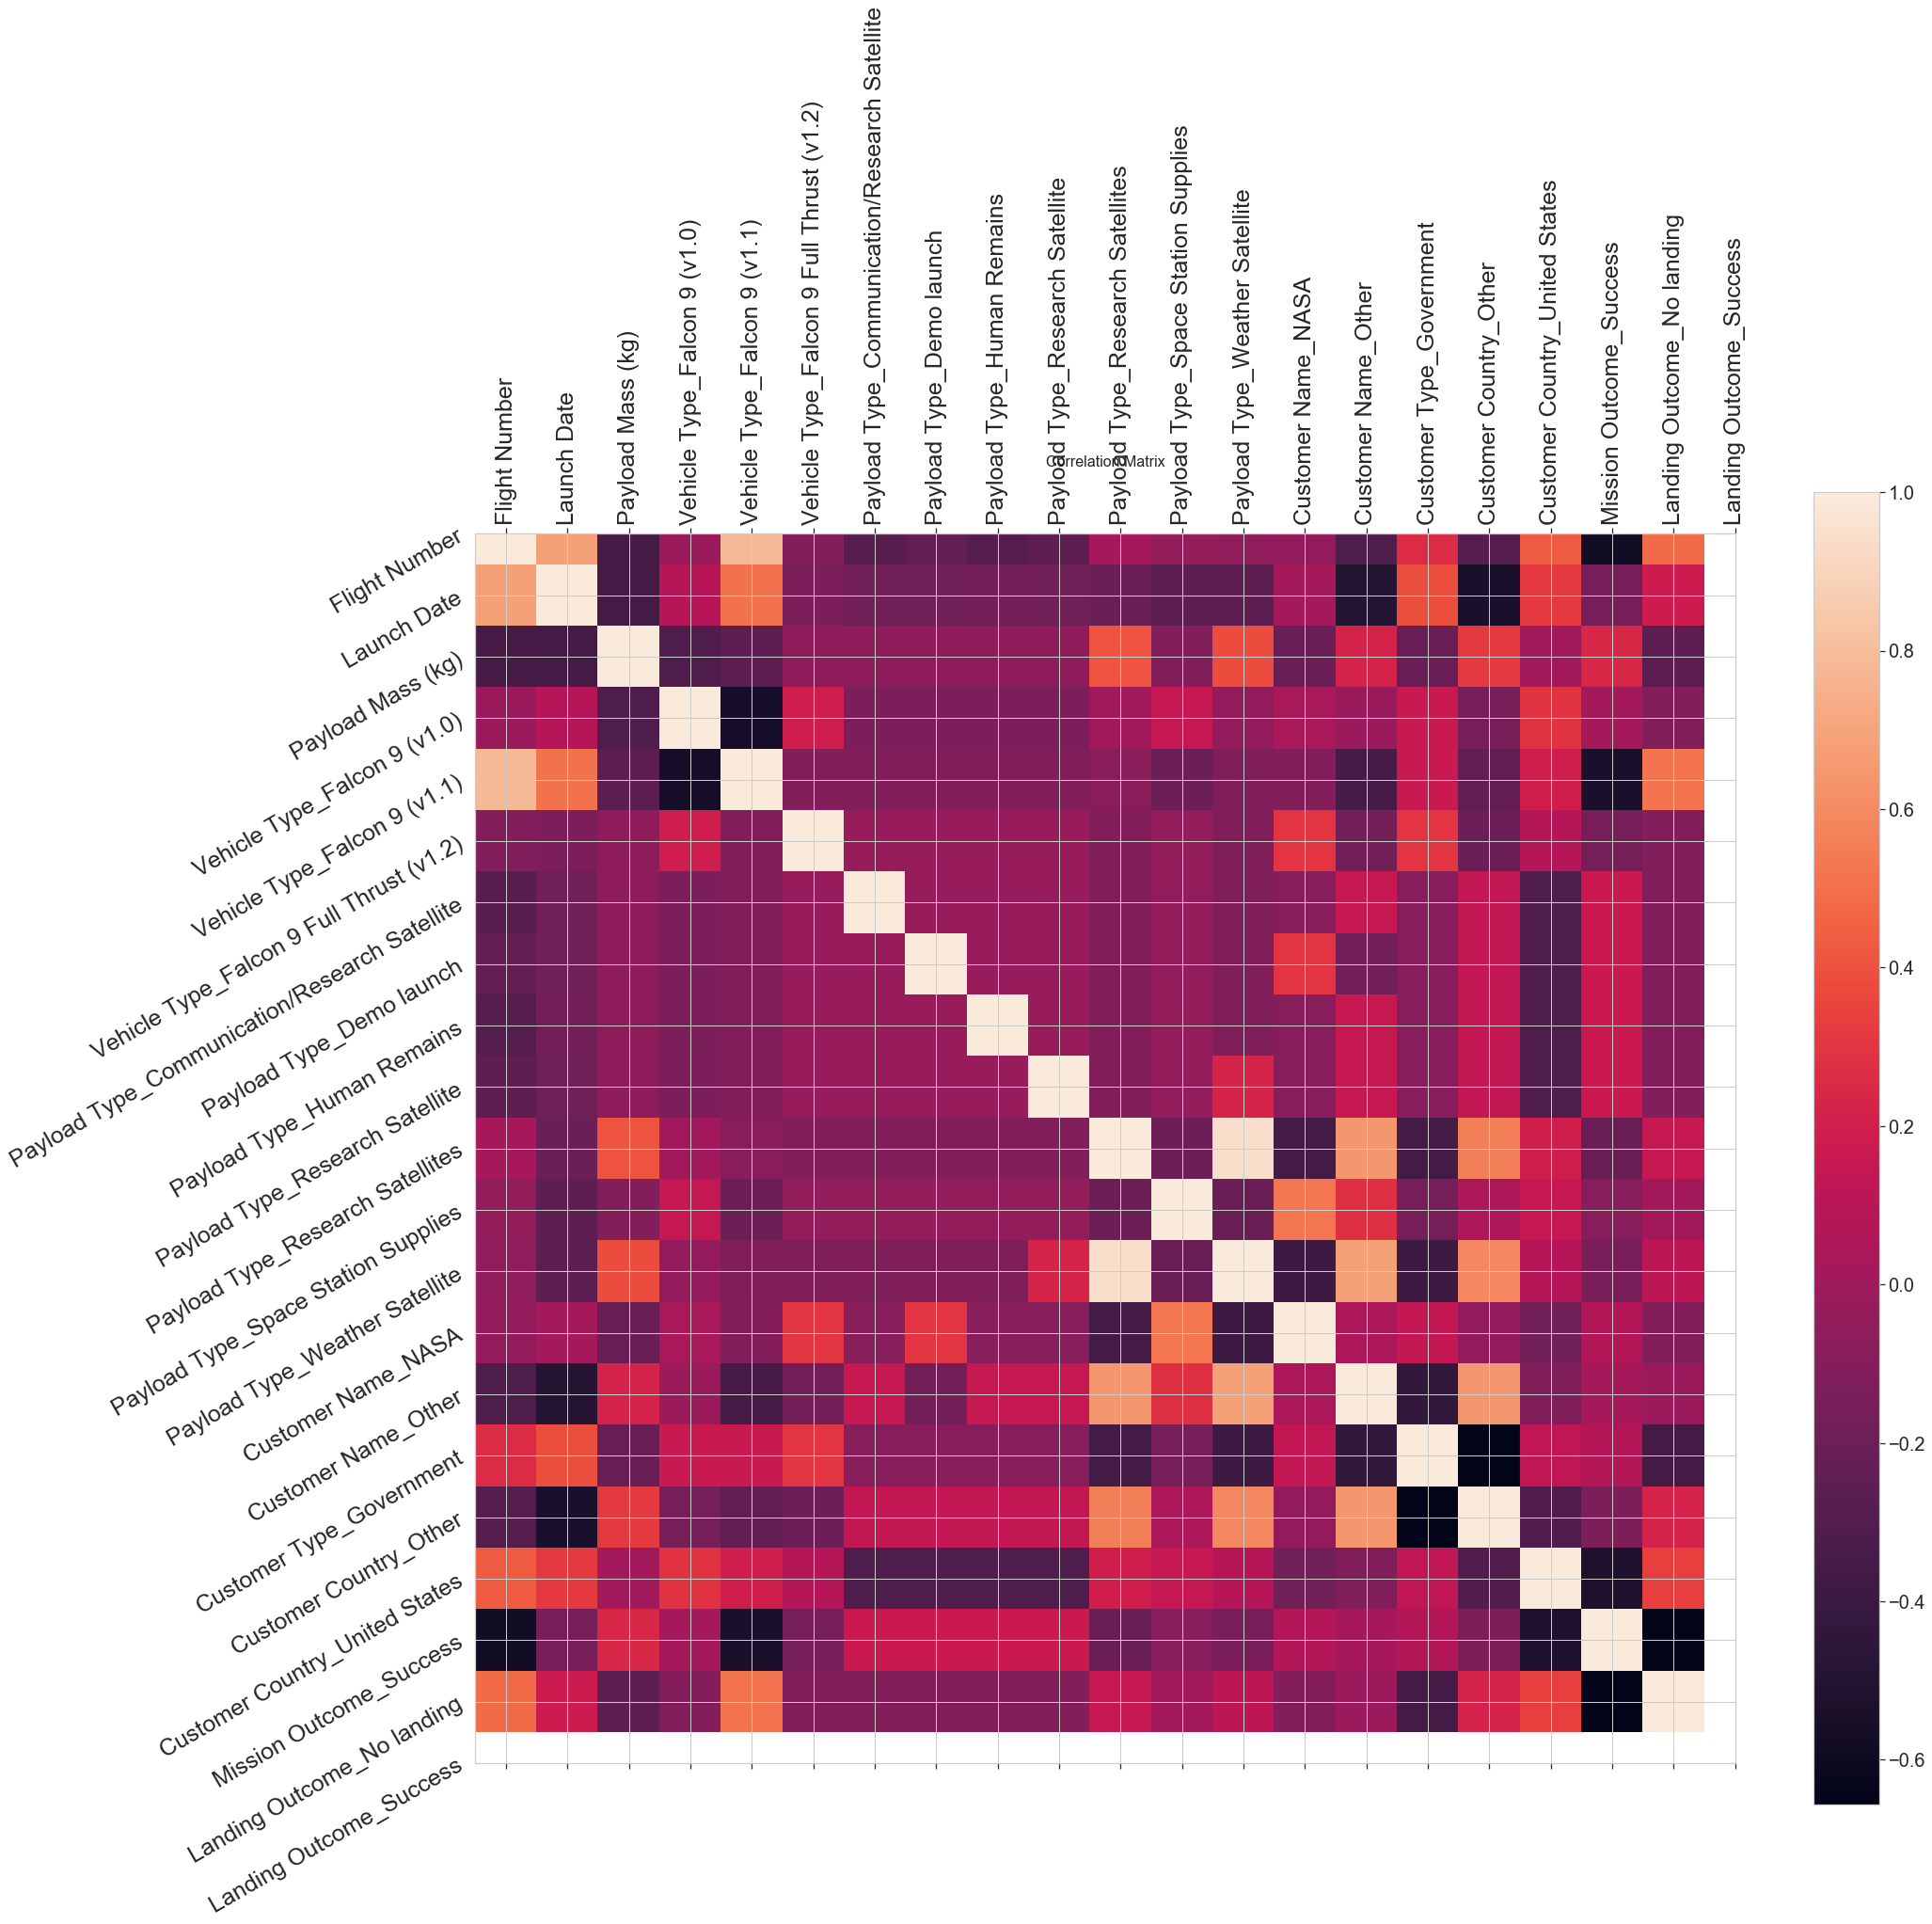

In [16]:
df_small = df.copy()
df_small.drop(["Launch Site_Kennedy Space Center LC-39A", "Launch Site_Marshall Islands", "Launch Site_Vandenberg AFB SLC-4E"], inplace=True, axis=1)
df_small.drop(["Customer Name_AsiaSat","Customer Name_DARPA", "Customer Name_Eutelsat (Satmex)", "Customer Name_Orbcomm", "Customer Name_SES", "Customer Name_SKY Perfect JSAT Group", "Customer Name_Thaicom"], inplace=True, axis=1)
df_small.drop(["Failure Reason_Engine Failure During Flight", "Failure Reason_Engine Fire During Launch", "Failure Reason_Engine Shutdown During Launch", "Failure Reason_No failure until landing", "Failure Reason_Vehicle Explosion Before Launch", "Failure Reason_Vehicle Explosion During Flight"], inplace=True, axis=1)
df_small.drop(["Landing Type_No info", "Landing Type_None", "Landing Type_Ocean", "Landing Type_Parachute", "Landing Type_Ship"], inplace=True, axis=1)

f = plt.figure(figsize=(30, 25))
plt.matshow(df_small.corr(), fignum=f.number)
plt.xticks(range(df_small.shape[1]), df_small.columns, fontsize=25, rotation=90)
plt.yticks(range(df_small.shape[1]), df_small.columns, fontsize=25, rotation=30)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=20)
plt.title('Correlation Matrix', fontsize=16);


Findings:
* Landing Outcome being a success is correlated with Flight Number and newer Falcon model. This makes sense, as SpaceX had most failures in the beginning
* Customer Type: Government is correlated with Launch Date. This is due to SpaceX having NASA as biggest customer in the beginning, but slowly developed to serve more business clients (Look at graphs under)

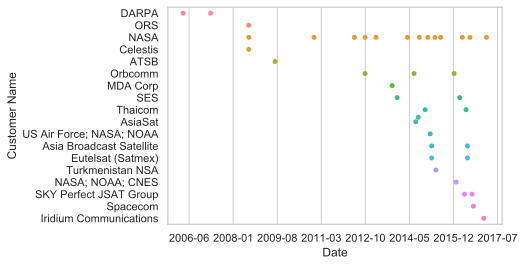

In [26]:
# Following code is courtesy of Kaggle user: danaugrs. Code found https://www.kaggle.com/danaugrs/spacex-missions-over-time. 
# Thank you for the great graphs :) 

import calendar
import time
import datetime

month = {v: k for k,v in enumerate(calendar.month_name)}

def dateToTimestamp(d):
    t = d.split()
    d = '{0}/{1}/{2}'.format(month[t[1]], t[0], t[2])
    return time.mktime(datetime.datetime.strptime(d, "%m/%d/%Y").timetuple())

data['timestamp'] = data['Launch Date'].apply(dateToTimestamp)

# This code is courtesy of Kaggle user: danaugrs. Code found https://www.kaggle.com/danaugrs/spacex-missions-over-time. 
# Thank you for the great graphs :) 

import seaborn as sns
import matplotlib
%matplotlib inline

sns.set_context("notebook")
sns.set_style("whitegrid")

def myFormatter(x, pos):
    return datetime.datetime.fromtimestamp(x).strftime('%Y-%m')

def plotOverTime(col):
    ax = sns.swarmplot(x="timestamp", y=col, data=data)
    ax.xaxis.set_major_formatter(matplotlib.ticker.FuncFormatter(myFormatter))
    ax.set(xlabel='Date')
    
plotOverTime('Customer Name')
# This code is courtesy of Kaggle user: danaugrs. Code found https://www.kaggle.com/danaugrs/spacex-missions-over-time. 
# Thank you for the great graphs :) 

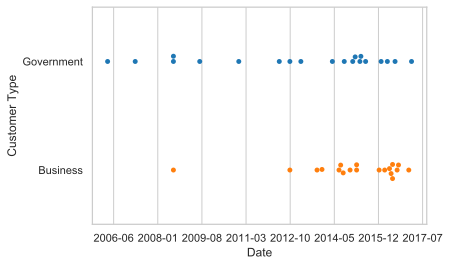

In [25]:
# Following code is courtesy of Kaggle user: danaugrs. Code found https://www.kaggle.com/danaugrs/spacex-missions-over-time. 
plotOverTime('Customer Type')

___________

___________

___________

___________

___________

___________

___________

___________

___________

# 3: Hypothesis 

### First hypothesis:
##### NASA is SpaceX's biggest customer.
* Null: The number of NASA contracts is equal to other firms. P(Nasa) = P(Others)
* Alternative: The number of NASA contracts is bigger than other firms. P(Nasa) > P(Others) 

In [20]:
from scipy.stats import binom
evenly_distributed = 18/39
prob = 1 - binom.cdf(13, evenly_distributed, 0.5)

print("P-value: ")
print(str(round(prob*100, 1))+"%")

P-value: 
0.0%


* I then tested this with p-value (As this is requested in the assignment description)
* Null: The number of NASA contracts is equal to other firms
* Alternative: The number of NASA contracts is bigger than other firms
* As the p-value < 0, the null-hypothesis is rejected, the alternative hypothesis is accepted, and the number of NASA contracts are more than other firms. This is also seen as NASA has 4 times more contracts than the second-largest, Orbcomm. 


### Second hypothesis:
##### Since 2014, SpaceX has been getting a lot more different customers


### Third hypothesis:
##### There is one failure reason more frequent than others


_________________________________

___________

_________________________________

_________________________________

# 4: Key insights

### Customer information:
* SpaceX' supremely biggest customer is NASA (Hypothesis tested)
* Landing Outcome being a success is correlated with Flight Number and newer Falcon model. This makes sense, as SpaceX had most failures in the beginning
* Customer Type: Government is correlated with Launch Date. This is due to SpaceX having NASA as biggest customer in the beginning, but slowly developed to serve more business clients 



________________________

# 5: Next step and looking-back

* Suggestions for next step would be to look at the trend of SpaceX' customer. Look into the companies and the division between business contracts and governmental 
* Though there were few examples, it was possible to derive insight. To continue investigating SpaceX, it would be preferable to find newer data

___________________